### Problem Statement - Our aim is to make a model that can predict if the tweet is related to a real disaster or not ,  so that during disasters, the model can differentiate between tweets during real time and help can be provided. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

## Exploratory Data  Analysis

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Finding number of unique elements in every column

train_df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [6]:
## Checking for null values

train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
## Printing Random values of Location

list(train_df['location'].dropna()[:50])

['Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'Live On Webcam',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja',
 'USA',
 'South Africa',
 'Sao Paulo, Brazil',
 'hollywoodland ',
 'Edmonton, Alberta - Treaty 6',
 'Inang Pamantasan',
 'Twitter Lockout in progress',
 'Concord, CA',
 'Calgary, AB',
 'Birmingham',
 'San Francisco',
 'CLVLND',
 'Nashville, TN',
 'Santa Clara, CA',
 'UK',
 'St. Louis, MO',
 'Walker County, Alabama',
 'Australia',
 'North Carolina',
 'Norf Carolina',
 'San Mateo County, CA',
 'North Carolina',
 'Njoro, Kenya',
 "Your Sister's Bedroom",
 'Arlington, TX',
 'South Bloomfield, OH',
 'New Hanover County, NC',
 'Maldives',
 'Manchester, NH',
 'Wilmington, NC',
 'New Hanover County, NC',
 'global']

In [8]:
## Checking for duplicated entries

train_df.duplicated().sum()

0

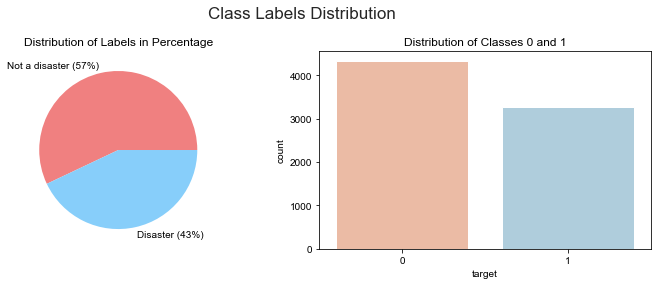

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
not_a_disaster=int(np.round(train_df['target'].value_counts()[0]/len(train_df)*100,0))
train_df['target'].value_counts().plot(kind='pie', labels=['Not a disaster ({}%)'.format(not_a_disaster) ,'Disaster ({}%)'.format(100-not_a_disaster)],
                                        colors=['lightcoral','lightskyblue'], ylabel='')
plt.title('Distribution of Labels in Percentage')


plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x=train_df['target'], palette='RdBu')
plt.title('Distribution of Classes 0 and 1')
plt.suptitle('Class Labels Distribution', fontsize=17)

plt.tight_layout()

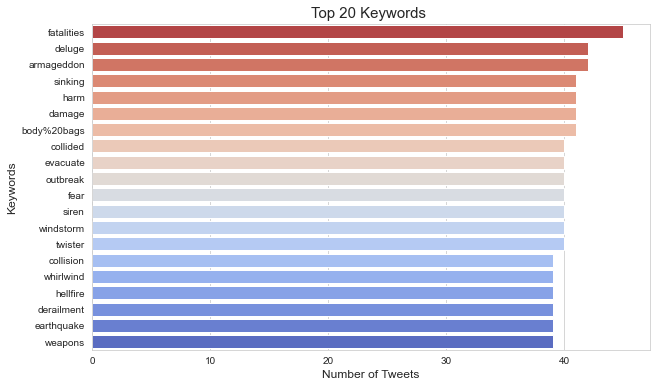

In [10]:
# Top 20 keywords
plt.figure(figsize=(10,6))
sns.countplot(y='keyword', data=train_df, order=train_df['keyword'].value_counts().iloc[:20].index,palette='coolwarm_r')
plt.xlabel('Number of Tweets', fontsize=12)
plt.ylabel('Keywords',fontsize=12)
plt.title('Top 20 Keywords ', fontsize=15)
plt.show()

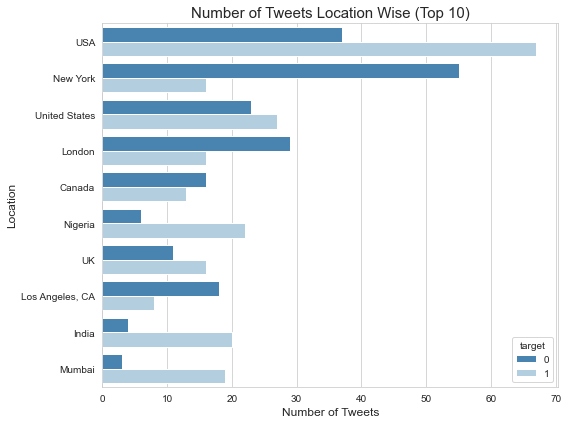

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(y='location',hue='target', data=train_df, order=train_df['location'].value_counts().iloc[:10].index,palette='Blues_r')
plt.xlabel('Number of Tweets',fontsize=12)
plt.ylabel('Location',fontsize=12)
plt.title('Number of Tweets Location Wise (Top 10)', fontsize=15)
plt.tight_layout()

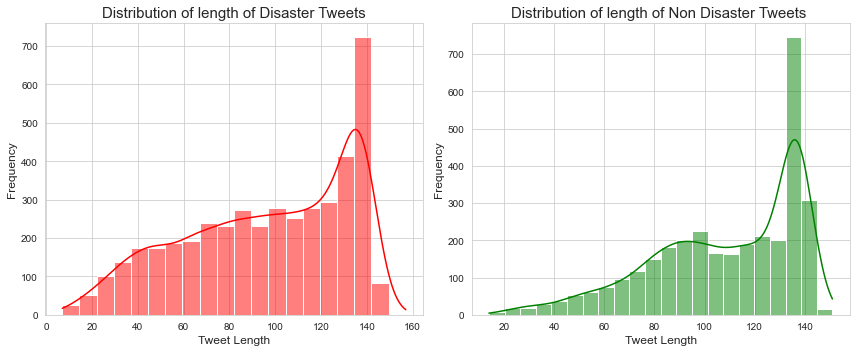

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df[train_df['target']==0]['text'].str.len(),kde=True,color='red')
plt.ylabel("Frequency",fontsize=12)
plt.xlabel('Tweet Length', fontsize=12)
plt.title('Distribution of length of Disaster Tweets',fontsize=15)

plt.subplot(1,2,2)
sns.histplot(data=train_df[train_df['target']==1]['text'].str.len(),kde=True,color='green')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel('Tweet Length', fontsize=12)
plt.title('Distribution of length of Non Disaster Tweets ',fontsize=15)
plt.tight_layout()

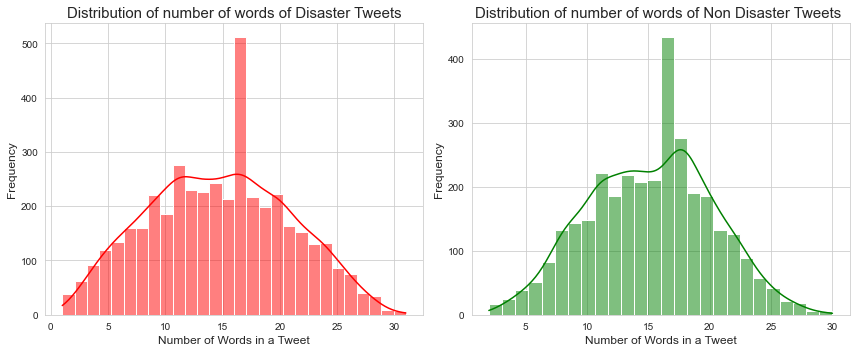

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df[train_df['target']==0]['text'].apply(lambda x: len(x.split())),kde=True,color='red')
plt.ylabel("Frequency",fontsize=12)
plt.xlabel('Number of Words in a Tweet', fontsize=12)
plt.title('Distribution of number of words of Disaster Tweets',fontsize=15)

plt.subplot(1,2,2)
sns.histplot(data=train_df[train_df['target']==1]['text'].apply(lambda x: len(x.split())),kde=True,color='green')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel('Number of Words in a Tweet', fontsize=12)
plt.title('Distribution of number of words of Non Disaster Tweets ',fontsize=15)
plt.tight_layout()

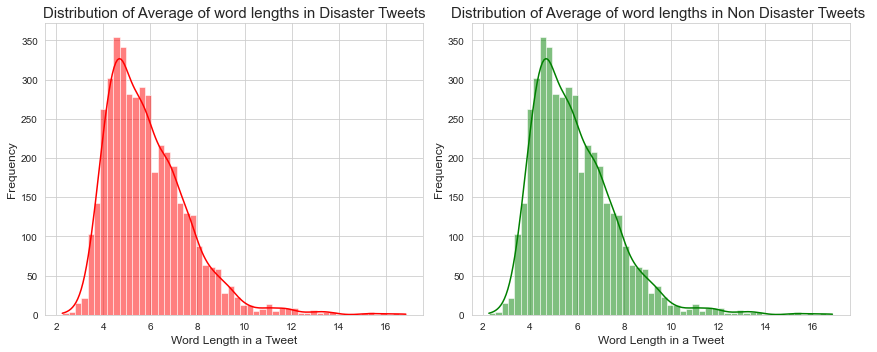

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : np.mean([len(i) for i in x])),kde=True,color='red')
plt.ylabel("Frequency",fontsize=12)
plt.xlabel('Word Length in a Tweet', fontsize=12)
plt.title('Distribution of Average of word lengths in Disaster Tweets',fontsize=15)

plt.subplot(1,2,2)
sns.histplot(data=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : np.mean([len(i) for i in x])),kde=True,color='green')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel('Word Length in a Tweet', fontsize=12)
plt.title('Distribution of Average of word lengths in Non Disaster Tweets ',fontsize=15)
plt.tight_layout()

###  Basic Preprocessing 

In [15]:
# ref - https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# ref - https://datagy.io/python-remove-punctuation-from-string/#:~:text=One%20of%20the%20easiest%20ways,maketrans()%20method.
# ref - https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing
# ref - https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

# 1) Converting to lower-case
# 2) Decontracting the text
# 3) Removing URLs
# 4) Removing HTMLs
# 5) Removing special characters
# 6) Removing emojis
# 7) Removing Slangs or chat words
# 8) Removing stopwords

In [16]:
# 1
def lowercase(text):
    return text.lower()

# 2
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'cause", " because", phrase)
    phrase = re.sub(r"let\'s", "let us", phrase)

    return phrase

# 3
def remove_url(text):
    text= re.sub(r'https?://\S+|www\.\S+', '', text)
    return text

# 4
def remove_html(text):
    text=re.sub(r'<.*?>','',text)
    return text

# 5
punctuations=string.punctuation
def remove_punc(text):
#     return text.translate(str.maketrans('', '', punctuations))
    text=re.sub(r'[^\w\s\d]', '', text)
    text =re.sub(r'[^A-za-z0-9\s]','',text)
    return text
          
# 6 
def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r'', text) # no emoji
    return text
    

In [17]:
# 7
# Converting slangs and chat words like BRB to Be Right Back, FYI to For Your Information
slangs="""AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA=Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
IG=Instagram
FB=Facebook"""

# Making the dictionary of the above strings
pattern=re.compile('\\n')
slangs=pattern.sub(r'  ',slangs)
slangs_dict={}
for i in slangs.split('  '):
    lst=i.split('=')
    slangs_dict[lst[0]]=lst[1]

def remove_slangs(text):
    new_text=[]
    for word in text.split():
        if word.upper() in slangs_dict:
            new_text.append(slangs_dict[word.upper()])
        else:
            new_text.append(word)
    return ' '.join(new_text)


In [18]:
# 8
STOPWORDS=stopwords.words('english')
# STOPWORDS.extend(['Ù','ù','ŭ','Ŭ','û','Û','ü','Ü'])

def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in STOPWORDS:
            new_text.append('')
        else:
            new_text.append(word)
    new_text=list(filter(None,new_text))
    return ' '.join(new_text)


In [19]:
def basic_preprocessing(text):
    
    text=lowercase(text)           # 1
    text=decontracted(text)        # 2    
    text=remove_url(text)          # 3
    text=remove_html(text)         # 4
    text=remove_punc(text)         # 5
    text=remove_emoji(text)        # 6
    text=remove_slangs(text)       # 7
    text=remove_stopwords(text)    # 8
    
    return text
    

In [20]:
preprocessed_df=train_df.copy()
preprocessed_df['text']=preprocessed_df['text'].apply(basic_preprocessing)

### Wordcloud

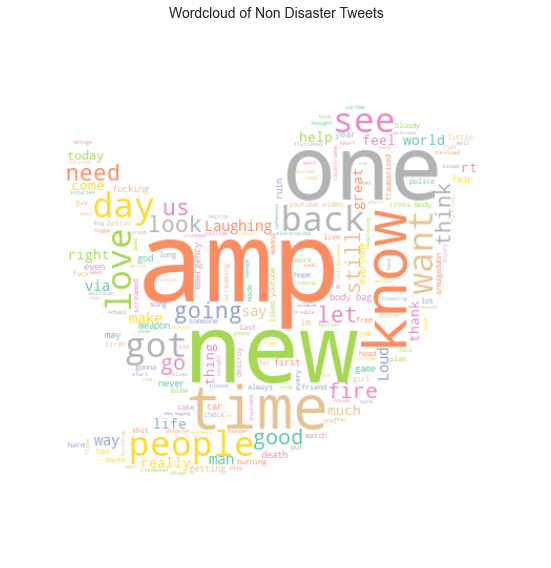

In [21]:
normal_tweets= ' '.join(preprocessed_df[preprocessed_df['target']==0]['text'].values)


mask = np.array(Image.open("twitter image2.png"))
word_cloud = WordCloud(width = 5000, height = 4000,background_color = 'white', colormap='Set2', mask=mask, max_words=200).generate(normal_tweets)
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Non Disaster Tweets', fontsize=14)
plt.tight_layout()
plt.savefig("twitter_n.png", format="png")
plt.show()

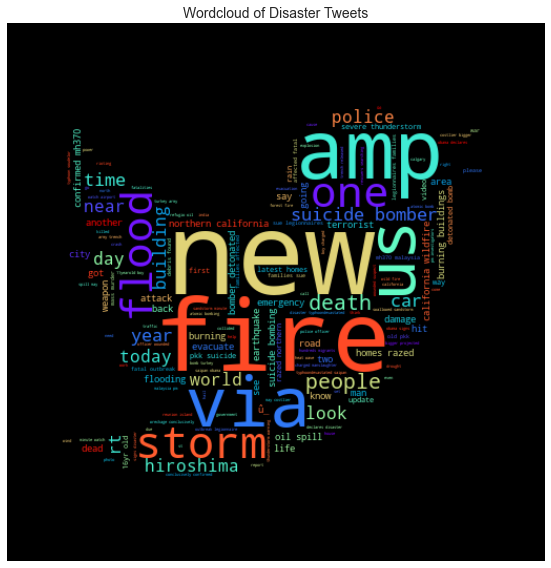

In [22]:
disaster_tweets= ' '.join(preprocessed_df[preprocessed_df['target']==1]['text'].values)

mask = np.array(Image.open("twitter image2.png"))
word_cloud = WordCloud(width = 5000, height = 4000,background_color='black',colormap='rainbow_r',max_words=200,mask=mask).generate(disaster_tweets)
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Disaster Tweets', fontsize=14)
plt.tight_layout()
plt.savefig("twitter_d.png", format="png")
plt.show()

#### Observations

- Data consists of 57% Non disaster tweets and 43% disaster tweets, so data is reasonably balanced
- Location column has more than 20 percent null values and the data in that column is also not reliable as it is filled with name of states, cities and words like global. It is not consistent
- Most of the Tweets were posted from USA.
- Length of Tweet, Number of Words in a Tweet and Average length of words in a Tweet are mostly same for both type of tweets, disaster and non-disaster.
- After basic preprocessing, it was found that Non-disaster tweets have most words like amp, new, time, one, know, need, go etc and Disaster tweets have most words like amp, new, flood, fire, via, suicide bomber etc
- After EDA, it was found that we can remove Keyword and Location column as they are not adding much value.